In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.patches import Circle
from scipy.integrate import odeint
from IPython.display import HTML

In [47]:
# Pendulum rod length (m), masses (kg).
L1 = 1
Lc1 = 0.5
m1, m2 = 0.5, 2
r = 0.05

# The gravitational acceleration (m.s-2).
g = 9.81

In [48]:
def deriv(q, t):
    theta_1, theta_1d, theta_2, theta_2d = q
    c1 = np.cos(theta_1)

    theta_1_dot = theta_1d
    theta_1d_dot = (-12*g*L1*m2*c1 - 12*g*Lc1*m1*c1)/(L1**2*m1 + 12*L1**2*m2 + 12*Lc1**2*m1)
    theta_2_dot = theta_2d
    theta_2d_dot = (12*g*Lc1*m1*m2*r**2*c1) / (L1**2*m1*m2*r**2 + 12*(L1*m2*r)**2 + 12*Lc1**2*m1*m2*r**2)
 
    return theta_1_dot, theta_1d_dot, theta_2_dot, theta_2d_dot

def simulate(ts, theta_1, theta_1d, theta_2, theta_2d):
    # Generalized coordinates
    q0 = np.array([theta_1, theta_1d, theta_2, theta_2d])
    q = odeint(deriv, q0, ts)

    theta1, theta2 = q[:,0], q[:,2]
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)
    x2 = x1 + r * np.cos(theta2)
    y2 = y1 + r * np.sin(theta2)
    return x1, y1, x2, y2

In [49]:
# Define time
tmax, dt = 1000, 0.01
t = np.arange(0, tmax+dt, dt)
x1, y1, x2, y2 = simulate(t, 0, 0, 0, 0)

KeyboardInterrupt: 

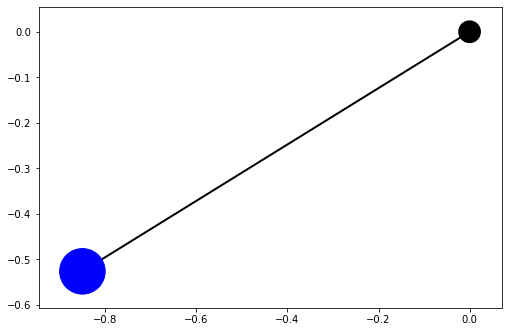

In [50]:
def animate(i):
    # Plot a frame of the pendulum configuration for timestep i.
    ax.clear()

    # The pendulum rod.
    ax.plot([0, x1[i]], [0, y1[i]], lw=2, color='k')

    # Circles representing the anchor point and the reaction wheel
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)

    # Line showing the angle of the reaction wheel
    ax.plot([x1[i], x2[i]], [y1[i], y2[i]], lw=2, color='red', zorder=11)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-L1-r, L1+r)
    ax.set_ylim(-L1-r, L1+r)
    ax.set_aspect('equal', adjustable='box')

fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)
ani = anim.FuncAnimation(fig, animate, frames=tmax, interval=dt * 1000)
HTML(ani.to_jshtml())